<a href="https://colab.research.google.com/github/kailasa-Nischal/ML/blob/main/Risk_Model_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Downloading The Dataset From Kaggle

In [ ]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction -p /content
!unzip heart-failure-prediction.zip -d /content

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 7.85MB/s]
Archive:  heart-failure-prediction.zip
  inflating: /content/heart.csv      


In [ ]:
X = pd.read_csv('heart.csv')

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Converting The Textual Data To Numeric In The Dataset

In [ ]:
Sex = list(X['Sex'])
for i in range(0,len(Sex)):
  if(Sex[i] == 'M'):
    Sex[i] = 0
  else:
    Sex[i] = 1


ChestPainType = list(X['ChestPainType'])
for i in range(0,len(ChestPainType)):
  if(ChestPainType[i] == 'TA'):
    ChestPainType[i] = 1
  elif(ChestPainType[i] == 'ATA'):
    ChestPainType[i] = 2
  elif(ChestPainType[i] == 'NAP'):
    ChestPainType[i] = 3
  else:
    ChestPainType[i] = 4


RestingECG = list(X['RestingECG'])
for i in range(0,len(RestingECG)):
  if(RestingECG[i] == 'ST'):
   RestingECG[i] = 1
  elif(RestingECG[i] == 'Normal'):
    RestingECG[i] = 2
  else:
    RestingECG[i] = 3


ExerciseAngina = list(X['ExerciseAngina'])
for i in range(0,len(ExerciseAngina)):
  if(ExerciseAngina[i] == 'N'):
    ExerciseAngina[i] = 0
  else:
    ExerciseAngina[i] = 1


ST_Slope = list(X['ST_Slope'])
for i in range(0,len(ST_Slope)):
  if(ST_Slope[i] == 'Up'):
   ST_Slope[i] = 1
  elif(ST_Slope[i] == 'Flat'):
    ST_Slope[i] = 2
  else:
    ST_Slope[i] = 3

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
X_data = pd.DataFrame()
X_data.head()

""


In [ ]:
X_data['Age'] = X['Age']
X_data['Sex'] = Sex
X_data['ChestPainType'] = ChestPainType
X_data['RestingBP'] = X['RestingBP']
X_data['Cholesterol'] = X['Cholesterol']

X_data['FastingBS'] = X['FastingBS']
X_data['RestingECG'] = RestingECG
X_data['MaxHR'] = X['MaxHR']
X_data['ExerciseAngina'] = ExerciseAngina
X_data['Oldpeak'] = X['Oldpeak']

X_data['ST_Slope'] = ST_Slope
X_data['HeartDisease'] = X['HeartDisease']

In [ ]:
X_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,2,172,0,0.0,1,0
1,49,1,3,160,180,0,2,156,0,1.0,2,1
2,37,0,2,130,283,0,1,98,0,0.0,1,0
3,48,1,4,138,214,0,2,108,1,1.5,2,1
4,54,0,3,150,195,0,2,122,0,0.0,1,0


In [ ]:
# X_data_extra = X_data.head(80)
# X_data_extra = X_data_extra.sample(frac = 1)
# X_data_extra

In [ ]:
# print(type(X_data),X_data.shape)
# X_data = pd.concat([X_data, X_data_extra], ignore_index = True, axis = 0)
# print(type(X_data),X_data.shape)

In [ ]:
print("Before Data Manuplation")
print(type(X_data),X_data.shape)
print(sum(X_data['HeartDisease'] == 1))
print(sum(X_data['HeartDisease'] == 0))

no_disease = X_data[X_data['HeartDisease'] == 0]
no_disease = no_disease.head(120)
no_disease = no_disease.sample(frac = 1)

disease = X_data[X_data['HeartDisease'] == 1]
disease = disease.head(10)
disease = disease.sample(frac = 1)

X_data = pd.concat([X_data, no_disease], ignore_index = True, axis = 0)
X_data = pd.concat([X_data, disease], ignore_index = True, axis = 0)

print("After Data Manuplation")
print(type(X_data),X_data.shape)
print(sum(X_data['HeartDisease'] == 1))
print(sum(X_data['HeartDisease'] == 0))

Before Data Manuplation
<class 'pandas.core.frame.DataFrame'> (918, 12)
508
410
After Data Manuplation
<class 'pandas.core.frame.DataFrame'> (1048, 12)
518
530


In [ ]:
X_data = X_data.sample(frac = 1)
X_data = X_data.sample(frac = 1)
Y = pd.DataFrame()
Y['HeartDisease'] = X_data['HeartDisease']
X_data = X_data.drop(['HeartDisease'], axis = 1)

In [ ]:
print(X_data.shape)
print(Y.shape)

(1048, 11)
(1048, 1)


Splliting The Dataset To Tain And Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_data, Y, train_size=0.9, random_state=0)

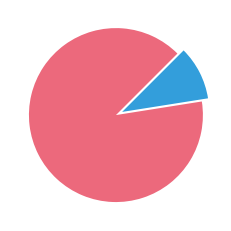

In [ ]:
y = np.array([90,10])
plt.pie(y,startangle = 45,explode = [0,0.08], colors = ["#ec697cff", "#339edbff"])
plt.show()

Principal Component Analysis Of The Train Dataset

In [ ]:
X_TRAIN_FOR_PCA = X_train_raw
X_TEST_FOR_PCA = X_test_raw
Y_TRAIN_FOR_PCA = y_train
Y_TEST_FOR_PCA = y_test

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_TRAIN_FOR_PCA_2 = sc.fit_transform(X_TRAIN_FOR_PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_TRAIN_FOR_PCA_2 = pca.fit_transform(X_TRAIN_FOR_PCA_2)
explained_variance = pca.explained_variance_ratio_
principalDf = pd.DataFrame(data = X_TRAIN_FOR_PCA_2
             , columns = ['principal component 1', 'principal component 2'])


In [ ]:
principalDf.reset_index(drop=True, inplace=True)
Y_TRAIN_FOR_PCA.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, Y_TRAIN_FOR_PCA], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,HeartDisease
0,1.399690,-0.464706,1
1,-0.186454,0.966958,0
2,-1.865482,-0.230666,1
3,-0.953419,0.065680,0
4,-0.865410,2.625635,1


In [ ]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1)

# # syntax for 3-D projection
# ax = plt.axes(projection ='3d')

# # # defining axes
# # z = np.linspace(0, 1, 100)
# # x = z * np.sin(25 * z)
# # y = z * np.cos(25 * z)
# # c = x + y
# # ax.scatter(x, y, z, c = c)



# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('3 component PCA', fontsize = 20)
# targets = [1, 0]
# colors = ['r', 'g']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['HeartDisease'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , finalDf.loc[indicesToKeep, 'principal component 3']
#                , c = color
#                , s = 50)
# ax.legend(['Having Heart Disease', 'Not Having Heart Disease'], loc='lower right')
# ax.grid()

# ax.view_init(10, 75)

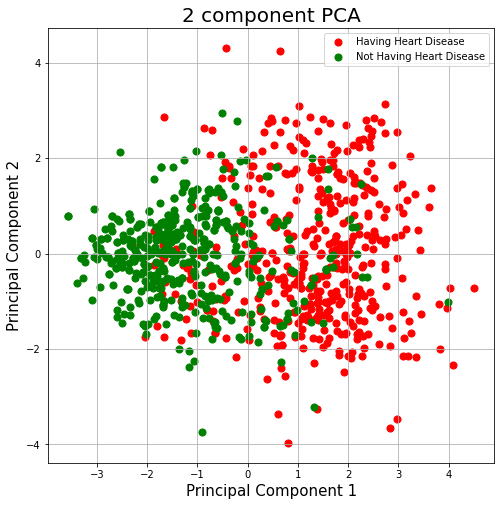

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['HeartDisease'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Having Heart Disease', 'Not Having Heart Disease'])
ax.grid()

Principal Component Analysis Of Test Dataset

In [ ]:
sc = StandardScaler()
X_TEST_FOR_PCA_2 = sc.fit_transform(X_TEST_FOR_PCA)

In [ ]:

pca = PCA(n_components = 2)
X_TEST_FOR_PCA_2 = pca.fit_transform(X_TEST_FOR_PCA_2)
explained_variance = pca.explained_variance_ratio_
principalDf = pd.DataFrame(data = X_TEST_FOR_PCA_2
             , columns = ['principal component 1', 'principal component 2'])


In [ ]:
principalDf.reset_index(drop=True, inplace=True)
Y_TEST_FOR_PCA.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, Y_TEST_FOR_PCA], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,HeartDisease
0,-0.721537,0.444608,0
1,-2.354847,0.713599,0
2,-2.088890,-0.761824,0
3,0.555316,1.627889,1
4,2.391990,1.859230,1


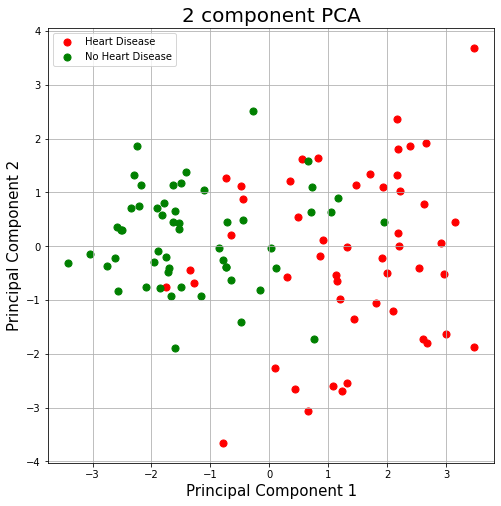

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['HeartDisease'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Heart Disease', 'No Heart Disease'])
ax.grid()

Developing The Logistic Regression Model

In [ ]:
def lr_model(X_train, y_train):

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # import the LogisticRegression class
    from sklearn.linear_model import LogisticRegression

    # create the model object
    model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)

    # fit the model to the training data
    # model.fit(X_train, y_train)

    ### END CODE HERE ###
    #return the fitted model
    return model

In [ ]:
np.array(y_train).shape

(943, 1)

In [ ]:
y_train_np = np.array(y_train).reshape(np.array(y_train).shape[0],)
X_train_raw_np = np.array(X_train_raw)

In [ ]:
model_X = lr_model(X_train_raw_np, y_train_np)

In [ ]:
model_X.predict_proba(np.array(X_test_raw)[2].reshape(1,11))

array([[0.94222483, 0.05777517]])

In [ ]:
np.array(y_test)[2]

array([0])

Logistic Regression
Train accuracy =  0.8568398727465536
Test accuracy =  0.8666666666666667
F1 Score =  0.866557734204793
Precision Score =  0.866557734204793
Recall Score =  0.866557734204793



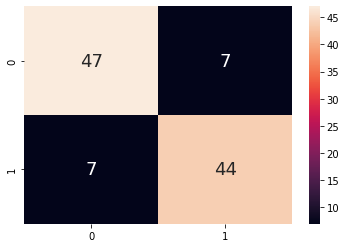

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import f1_score, precision_score, recall_score


print("Logistic Regression")
y_true = np.array(y_train_np)
y_pred = model_X.predict(np.array(X_train_raw))
train_accuracy = accuracy_score(y_true, y_pred)
print("Train accuracy = ", train_accuracy)


y_true = np.array(y_test)
y_pred = model_X.predict(np.array(X_test_raw))
test_accuracy = accuracy_score(y_true, y_pred)
print("Test accuracy = ", test_accuracy)

print("F1 Score = ", f1_score(y_true, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_true, y_pred, average="macro"))
print("Recall Score = ", recall_score(y_true, y_pred, average="macro"))
print()

cm = confusion_matrix(y_true, y_pred)
sn.heatmap(cm, annot=True, annot_kws={"size": 18})

In [ ]:
import joblib

filename = 'risk_model.pkl'
joblib.dump(model_X, filename)

['risk_model.pkl']

C - Index

In [ ]:
def cindex(y_true, scores):
    '''

    Input:
    y_true (np.array): a 1-D array of true binary outcomes (values of zero or one)
        0: patient does not get the disease
        1: patient does get the disease
    scores (np.array): a 1-D array of corresponding risk scores output by the model

    Output:
    c_index (float): (concordant pairs + 0.5*ties) / number of permissible pairs
    '''
    n = len(y_true)
    assert len(scores) == n

    concordant = 0
    permissible = 0
    ties = 0

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # use two nested for loops to go through all unique pairs of patients
    for i in range(n):
        for j in range(i+1, n): #choose the range of j so that j>i

            # Check if the pair is permissible (the patient outcomes are different)
            if y_true[i] != y_true[j]:
                # Count the pair if it's permissible
                permissible += 1

                # For permissible pairs, check if they are concordant or are ties

                # check for ties in the score
                if scores[i] == scores[j]:
                    # count the tie
                    ties += 1
                    # if it's a tie, we don't need to check patient outcomes, continue to the top of the for loop.
                    continue

                # case 1: patient i doesn't get the disease, patient j does
                if y_true[i] == 0 and y_true[j] == 1:
                    # Check if patient i has a lower risk score than patient j
                    if scores[i] < scores[j]:
                        # count the concordant pair
                        concordant += 1
                    # Otherwise if patient i has a higher risk score, it's not a concordant pair.
                    # Already checked for ties earlier

                # case 2: patient i gets the disease, patient j does not
                if y_true[i] == 1 and y_true[j] == 0:
                    # Check if patient i has a higher risk score than patient j
                    if scores[i] > scores[j]:
                        #count the concordant pair
                        concordant += 1
                    # Otherwise if patient i has a lower risk score, it's not a concordant pair.
                    # We already checked for ties earlier

    # calculate the c-index using the count of permissible pairs, concordant pairs, and tied pairs.
    c_index = (concordant + 0.5 * ties) / permissible
    ### END CODE HERE ###

    return c_index

In [ ]:
X_test_raw = np.array(X_test_raw)

In [ ]:
scores = model_X.predict_proba(X_test_raw)[:, 1]
c_index_X_test = cindex(y_test.values, scores)
print(f"c-index on test set is {c_index_X_test:.4f}")

c-index on test set is 0.9394


Plot Representing The Weights Given To A Particular Parameter

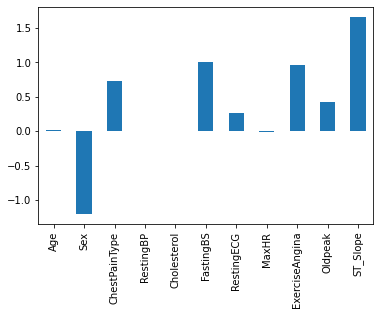

In [ ]:
coeffs = pd.DataFrame(data = model_X.coef_, columns = X_train_raw.columns)
coeffs.T.plot.bar(legend=None);

In [ ]:
print('''
Results of the Logistic Risk Model
''')

print("Accuracy of the model on train set is ", train_accuracy)
print("Accuracy of the model on test set is ", test_accuracy)
print("F1 Score = ", f1_score(y_true, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_true, y_pred, average="macro"))
print("Recall Score = ", recall_score(y_true, y_pred, average="macro"))
print("C-Index of the model on test set is ", c_index_X_test)


Results of the Logistic Risk Model

Accuracy of the model on train set is  0.8568398727465536
Accuracy of the model on test set is  0.8666666666666667
F1 Score =  0.866557734204793
Precision Score =  0.866557734204793
Recall Score =  0.866557734204793
C-Index of the model on test set is  0.939360929557008


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_raw_np, y_train_np)

SVR()

In [ ]:
y_pred_test = regressor.predict(np.array(X_test_raw))

In [ ]:
y_pred_test[0:5]

array([0.10277964, 0.11531049, 0.05031429, 0.76573965, 0.64080354])

In [ ]:
regressor.predict(np.array(X_test_raw)[2].reshape(1,11))

array([0.05031429])

In [ ]:
np.array(y_test)[2]

array([0])

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_raw_np, y_train_np)

#Predict the response for test dataset
y_pred = clf.predict(X_test_raw)

In [ ]:
clf.predict(np.array(X_test_raw)[2].reshape(1,11))

array([0])

SVM
Train accuracy =  0.8663838812301167
Test accuracy =  0.8666666666666667
F1 Score =  0.8663636363636363
Precision Score =  0.8673469387755102
Recall Score =  0.8660130718954249
c-index on test set is 0.8021



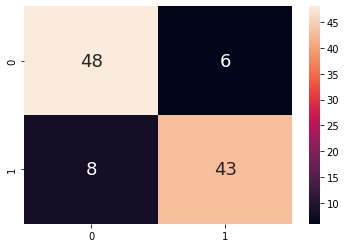

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

print("SVM")
y_true = np.array(y_train_np)
y_pred = clf.predict(np.array(X_train_raw))
train_accuracy = accuracy_score(y_true, y_pred)
print("Train accuracy = ", train_accuracy)


y_true = np.array(y_test)
y_pred = clf.predict(np.array(X_test_raw))
test_accuracy = accuracy_score(y_true, y_pred)
print("Test accuracy = ", test_accuracy)
print("F1 Score = ", f1_score(y_true, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_true, y_pred, average="macro"))
print("Recall Score = ", recall_score(y_true, y_pred, average="macro"))
scores = regressor.predict(X_test_raw)
c_index_X_test = cindex(y_test.values, scores)
print(f"c-index on test set is {c_index_X_test:.4f}")
print()

cm = confusion_matrix(y_true, y_pred)
sn.heatmap(cm, annot=True, annot_kws={"size": 18})

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train_raw_np, y_train_np)

#Predict the response for test dataset
knn.predict(np.array(X_test_raw)[2].reshape(1,11))

array([0])

KNN
Train accuracy =  0.7879109225874867
Test accuracy =  0.7333333333333333
F1 Score =  0.733115468409586
Precision Score =  0.733115468409586
Recall Score =  0.733115468409586
c-index on test set is 0.7331



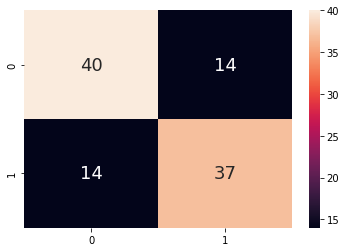

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

print("KNN")
y_true = np.array(y_train_np)
y_pred = knn.predict(np.array(X_train_raw))
train_accuracy = accuracy_score(y_true, y_pred)
print("Train accuracy = ", train_accuracy)


y_true = np.array(y_test)
y_pred = knn.predict(np.array(X_test_raw))
test_accuracy = accuracy_score(y_true, y_pred)
print("Test accuracy = ", test_accuracy)
print("F1 Score = ", f1_score(y_true, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_true, y_pred, average="macro"))
print("Recall Score = ", recall_score(y_true, y_pred, average="macro"))
scores = knn.predict(X_test_raw)
c_index_X_test = cindex(y_test.values, scores)
print(f"c-index on test set is {c_index_X_test:.4f}")
print()

cm = confusion_matrix(y_true, y_pred)
sn.heatmap(cm, annot=True, annot_kws={"size": 18})

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=11, input_dim=11, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=7, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation="sigmoid"))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Fitting the ANN to the Training set
model.fit(X_train_raw_np, y_train_np , validation_data=(np.array(X_test_raw), np.array(y_test)),batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
48/48 [==============================] - 1s 8ms/step - loss: 0.2500 - accuracy: 0.4910 - val_loss: 0.2500 - val_accuracy: 0.4857
Epoch 2/50
48/48 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.5164 - val_loss: 0.2498 - val_accuracy: 0.6667
Epoch 3/50
48/48 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.5217 - val_loss: 0.2456 - val_accuracy: 0.5810
Epoch 4/50
48/48 [==============================] - 0s 3ms/step - loss: 0.2426 - accuracy: 0.5949 - val_loss: 0.2302 - val_accuracy: 0.6476
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.5938 - val_loss: 0.2173 - val_accuracy: 0.6667
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.6098 - val_loss: 0.2123 - val_accuracy: 0.6667
Epoch 7/50
48/48 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.5896 - val_loss: 0.2135 - val_accuracy: 0.6667
Epoch 8/50
48/48 [==

In [ ]:
model.predict(np.array(X_test_raw)[2].reshape(1,11))

array([[0.05058271]], dtype=float32)

In [ ]:
perdictions = model.predict(np.array(X_train_raw)).reshape(np.array(y_train).shape[0],)
outcomes = []
for risk in perdictions:
  if risk>0.5:
    outcomes.append(1)
  else:
    outcomes.append(0)

outcomes = np.array(outcomes)
print(outcomes.shape)

(943,)


ANN
Train accuracy =  0.8345705196182397
Test accuracy =  0.8095238095238095
F1 Score =  0.8095065312046443
Precision Score =  0.8096879535558781
Recall Score =  0.8099128540305011
c-index on test set is 0.8980



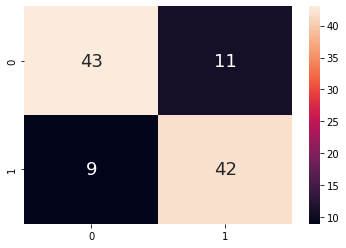

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

print("ANN")
y_true = np.array(y_train_np)
y_pred = model.predict(np.array(X_train_raw))
outcomes = []
for risk in y_pred:
  if risk>0.5:
    outcomes.append(1)
  else:
    outcomes.append(0)

outcomes = np.array(outcomes)
train_accuracy = accuracy_score(y_true, outcomes)
print("Train accuracy = ", train_accuracy)


y_true = np.array(y_test)
y_pred = model.predict(np.array(X_test_raw))
outcomes = []
for risk in y_pred:
  if risk>0.5:
    outcomes.append(1)
  else:
    outcomes.append(0)

outcomes = np.array(outcomes)
test_accuracy = accuracy_score(y_true, outcomes)
print("Test accuracy = ", test_accuracy)
print("F1 Score = ", f1_score(y_true, outcomes, average="macro"))
print("Precision Score = ", precision_score(y_true, outcomes, average="macro"))
print("Recall Score = ", recall_score(y_true, outcomes, average="macro"))
scores = model.predict(X_test_raw)
c_index_X_test = cindex(y_test.values, scores)
print(f"c-index on test set is {c_index_X_test:.4f}")
print()

cm = confusion_matrix(y_true, outcomes)
sn.heatmap(cm, annot=True, annot_kws={"size": 18})

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
dtree = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
dtree = dtree.fit(X_train_raw_np, y_train_np)

#Predict the response for test dataset
dtree.predict_proba(np.array(X_test_raw)[2].reshape(1,11))

array([[0.97666667, 0.02333333]])

Decision Trees
Train accuracy =  0.9045599151643691
Test accuracy =  0.8571428571428571



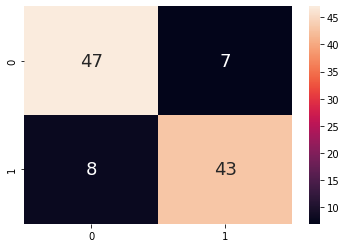

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

print("Decision Trees")
y_true = np.array(y_train_np)
y_pred = dtree.predict(np.array(X_train_raw))
train_accuracy = accuracy_score(y_true, y_pred)
print("Train accuracy = ", train_accuracy)


y_true = np.array(y_test)
y_pred = dtree.predict(np.array(X_test_raw))
test_accuracy = accuracy_score(y_true, y_pred)
print("Test accuracy = ", test_accuracy)
print()
cm = confusion_matrix(y_true, y_pred)
sn.heatmap(cm, annot=True, annot_kws={"size": 18})

In [ ]:
scores = model_X.predict_proba(X_test_raw)[:, 1]
c_index_X_test = cindex(y_test.values, scores)
print(f"c-index on test set is {c_index_X_test:.4f}")

c-index on test set is 0.9394


In [ ]:
print('''
Results of the Decision trees
''')

print("Accuracy of the model on train set is ", train_accuracy)
print("Accuracy of the model on test set is ", test_accuracy)
print("F1 Score = ", f1_score(y_true, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_true, y_pred, average="macro"))
print("Recall Score = ", recall_score(y_true, y_pred, average="macro"))
print("C-Index of the model on test set is ", c_index_X_test)


Results of the Decision trees

Accuracy of the model on train set is  0.9045599151643691
Accuracy of the model on test set is  0.8571428571428571
F1 Score =  0.8569352348078845
Precision Score =  0.8572727272727272
Recall Score =  0.8567538126361656
C-Index of the model on test set is  0.939360929557008


In [ ]:
!pip install graphviz
!pip install pydotplus

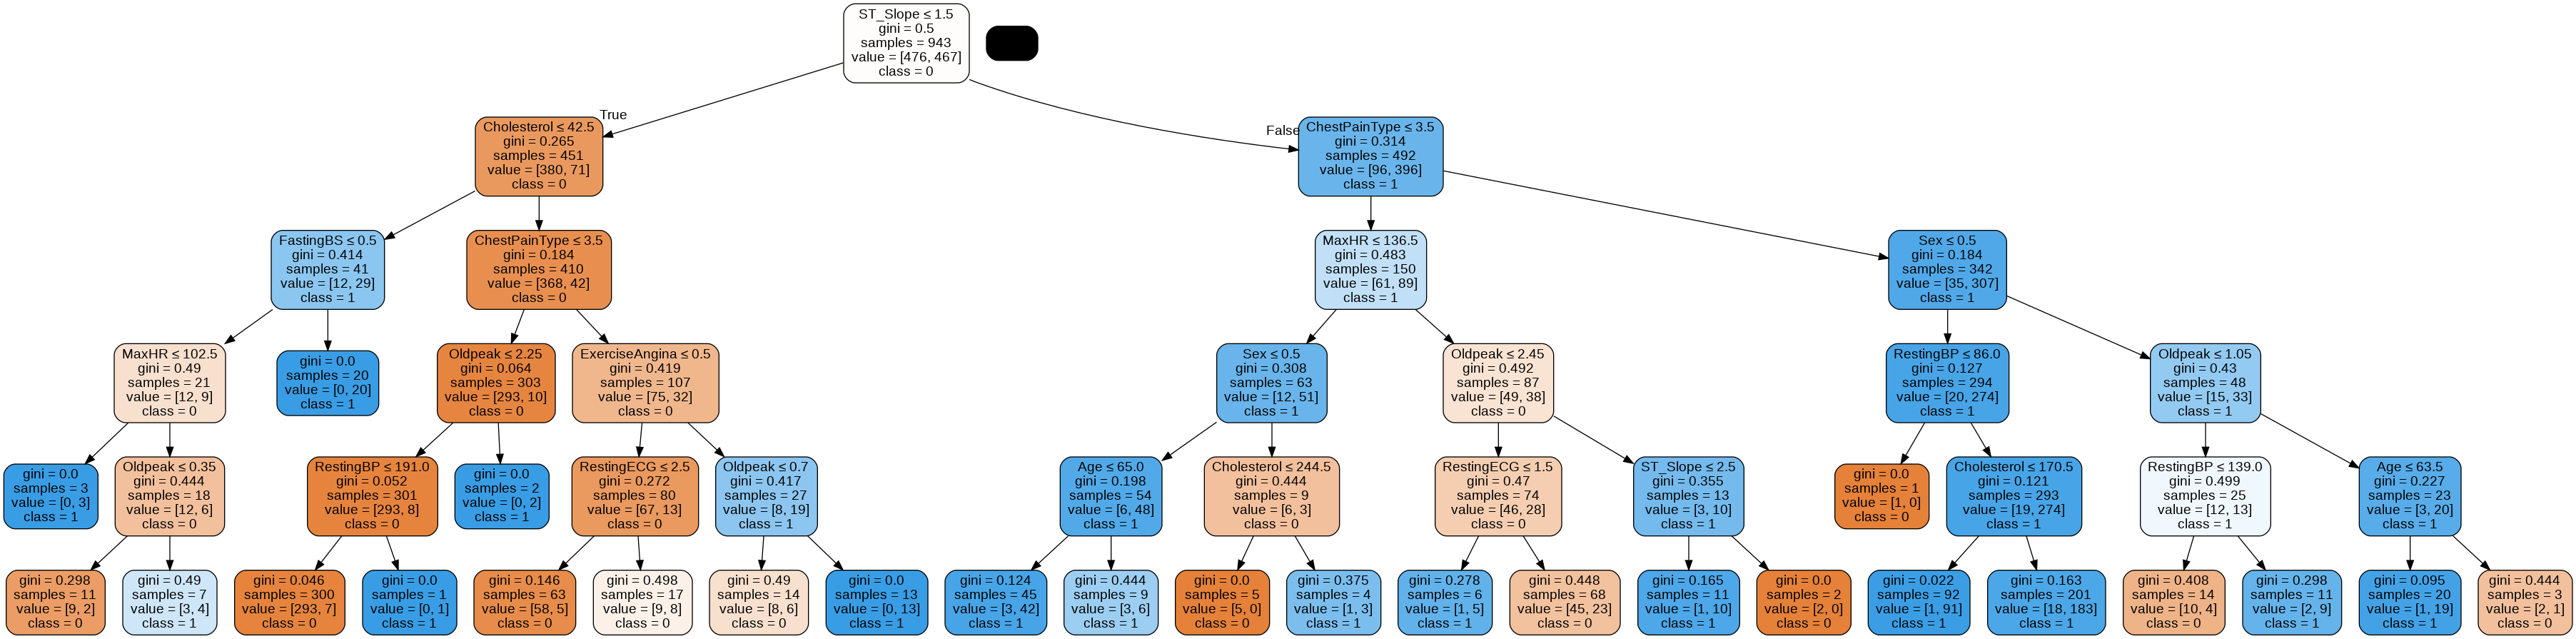

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X_data.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart Risk.png')
Image(graph.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
rforrest = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rforrest.fit(X_train_raw_np, y_train_np)

rforrest.predict_proba(np.array(X_test_raw)[2].reshape(1,11))

array([[1., 0.]])

Random Forrests
Train accuracy =  1.0
Test accuracy =  0.9142857142857143



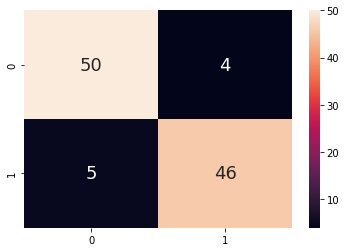

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

print("Random Forrests")
y_true = np.array(y_train_np)
y_pred = rforrest.predict(np.array(X_train_raw))
train_accuracy = accuracy_score(y_true, y_pred)
print("Train accuracy = ", train_accuracy)


y_true = np.array(y_test)
y_pred = rforrest.predict(np.array(X_test_raw))
test_accuracy = accuracy_score(y_true, y_pred)
print("Test accuracy = ", test_accuracy)

print()
cm = confusion_matrix(y_true, y_pred)
sn.heatmap(cm, annot=True, annot_kws={"size": 18})

In [ ]:
y_true = np.array(y_test)
y_pred = rforrest.predict_proba(np.array(X_train_raw))
# train_accuracy = accuracy_score(y_true, y_pred)
print(y_pred[0:10])

[[0.13 0.87]
 [0.98 0.02]
 [0.19 0.81]
 [0.98 0.02]
 [0.06 0.94]
 [0.85 0.15]
 [0.06 0.94]
 [0.63 0.37]
 [0.96 0.04]
 [1.   0.  ]]


In [ ]:
scores = model_X.predict_proba(X_test_raw)[:, 1]
c_index_X_test = cindex(y_test.values, scores)
print(f"c-index on test set is {c_index_X_test:.4f}")

c-index on test set is 0.9394


In [ ]:
print('''
Results of the Random Forrest
''')

print("Accuracy of the model on train set is ", train_accuracy)
print("Accuracy of the model on test set is ", test_accuracy)
print("F1 Score = ", f1_score(y_true, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_true, y_pred, average="macro"))
print("Recall Score = ", recall_score(y_true, y_pred, average="macro"))
print("C-Index of the model on test set is ", c_index_X_test)


Results of the Random Forrest

Accuracy of the model on train set is  1.0
Accuracy of the model on test set is  0.9142857142857143
F1 Score =  0.9141611408847307
Precision Score =  0.9145454545454546
Recall Score =  0.9139433551198257
C-Index of the model on test set is  0.939360929557008


In [ ]:
# # Generating Predictions on testing data
# Predictions=model.predict(np.array(X_train_raw))

# # Scaling the predicted Price data back to original price scale
# Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# # Scaling the y_test Price data back to original price scale
# y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# # Scaling the test data back to original scale
# Test_Data=PredictorScalerFit.inverse_transform(X_test)

# TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
# TestingData['Price']=y_test_orig
# TestingData['PredictedPrice']=Predictions
# TestingData.head()

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [ ]:
# tf_model = keras.Sequential()
# tf_model.add(layers.Dense(2, activation="relu"))
# tf_model.add(layers.Dense(3, activation="relu"))
# tf_model.add(layers.Dense(1, activation="relu"))

In [ ]:
# tf_model.compile(
#     optimizer=keras.optimizers.RMSprop(),
#     loss=keras.losses.MeanSquaredError(),
#     metrics=[keras.metrics.SparseCategoricalAccuracy()],
# )

In [ ]:
# history = tf_model.fit(
#     X_train_raw, y_train,
#     epochs=5
# )

In [ ]:
# tf_model.predict(np.array(X_test_raw)[0].reshape(1,11))

In [ ]:
# np.array(X_test_raw)[0].reshape(1,11).shape

In [ ]:
import matplotlib.pyplot as plt

LR = plt.imread("/content/confusion matrix for logistic regression.png")
SVM = plt.imread("/content/confusion matrix for SVM.png")
KNN = plt.imread("/content/confusion matrix for KNN.png")
DTrees = plt.imread("/content/confusion matrix for Decision Trees.png")
RForrests = plt.imread("/content/confusion matrix for Random Forrests.png")

fontsize = 5

plt.figure(figsize=(1, 1), dpi=1000)
plt.subplot(5,1,1)
plt.imshow(LR,interpolation="nearest", aspect='auto')
plt.title("Confusion Matrix For Logistic Regression", fontsize=fontsize)
plt.axis('off')
plt.subplot(5,1,2)
plt.imshow(SVM,interpolation="nearest", aspect='auto')
plt.title("Confusion Matrix For SVM", fontsize=fontsize)
plt.axis('off')
plt.subplot(5,1,3)
plt.imshow(KNN,interpolation="nearest", aspect='auto')
plt.title("Confusion Matrix For KNN", fontsize=fontsize)
plt.axis('off')
plt.subplot(5,1,4)
plt.imshow(DTrees,interpolation="nearest", aspect='auto')
plt.title("Confusion Matrix For Decision Trees", fontsize=fontsize)
plt.axis('off')
plt.subplot(5,1,5)
plt.imshow(RForrests,interpolation="nearest", aspect='auto')
plt.title("Confusion Matrix For Random Forrests", fontsize=fontsize)
plt.axis('off')
fig.tight_layout()
plt.show()

plt.savefig("test.png",bbox_inches='tight',pad_inches=0.0)

FileNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt

LR = plt.imread("/content/confusion matrix for logistic regression.png")
SVM = plt.imread("/content/confusion matrix for SVM.png")
KNN = plt.imread("/content/confusion matrix for KNN.png")
DTrees = plt.imread("/content/confusion matrix for Decision Trees.png")
RForrests = plt.imread("/content/confusion matrix for Random Forrests.png")

fontsize = 12

# plt.figure(figsize=(1, 1), dpi=800)
plt.subplot(2,2,1)
plt.imshow(LR,interpolation="nearest", aspect='auto')
plt.title("Confusion Matrix For\nLogistic Regression", fontsize=fontsize)
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(SVM,interpolation="nearest", aspect='auto')
plt.title("Confusion Matrix For\nSVM", fontsize=fontsize)
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(KNN,interpolation="nearest", aspect='auto')
plt.title("Confusion Matrix For\nKNN", fontsize=fontsize)
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(DTrees,interpolation="nearest", aspect='auto')
plt.title("Confusion Matrix For\nDecision Trees", fontsize=fontsize)
plt.axis('off')
# plt.subplot(5,1,5)
# plt.imshow(RForrests,interpolation="nearest", aspect='auto')
# plt.title("Confusion Matrix For Random Forrests", fontsize=fontsize)
# plt.axis('off')
# fig.tight_layout()
# plt.show()

plt.savefig("test.png",bbox_inches='tight',pad_inches=0.0, dpi=3000)